In [1]:
######################################################################################################
# Purpose: Check the rtds to see if the second peak is there by experimenting with diffent grouding  #
######################################################################################################


import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq


Welcome to JupyROOT 6.28/06


In [17]:
# Define the list of file paths
root_file_paths = [
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_39_33.root', #ch2
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_40_12.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_40_59.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_42_36.root', #ch3
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_43_27.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/10_27_2023_09_45_11.root'
 
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_38_05.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_39_55.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_41_14.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_42_56.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_44_19.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_45_32.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_46_31.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_47_21.root',
   #'/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_14_48_05.root'

   # '/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_16_08_00.root',
   # '/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_16_08_48.root',
   # '/home/wwz/saq_analysis/calibration/testing_grounding/11_01_2023_16_09_35.root'

    '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_10_30_25.root',
    '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_10_35_00.root',
    '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_10_36_22.root',

   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_11_54_37.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_11_55_22.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_11_56_06.root'

   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_12_05_43.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_12_07_32.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_12_08_13.root'

    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_09_07.root',
    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_11_35.root',
    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_10_39.root'

    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_24_23.root',
    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_25_04.root',
    #'/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_13_25_52.root'
# hold the connector with hands
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_14_23_21.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_14_24_12.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_14_24_55.root'
#wrap the connector with Al foil
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_16_03_45.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_16_04_26.root',
   # '/home/wwz/saq_analysis/calibration/11_06_2023_testing_new_setup/11_06_2023_16_05_23.root'

    
]
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

real_channel= [2, 3, 4]

# Iterate through each root file
for j, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    print(len(timestamps))
    print(timestamps[:20])
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
  
    #This line does the same thing as the loop above, but in a more consice and Pythonic way
    filtered_timestamps = [timestamps[i] for i in range(5, len(timestamps)) if mask[i] == 2**(real_channel[j]-1)]
    
    print(len(filtered_timestamps))
    print(filtered_timestamps[:20])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)

    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

27875
[ 126866  126954  286000  286074  286135  482542  482627  482630  649020
  649023  811926 1007500 1170704 1170707 1337940 1338024 1338027 1531065
 1692507 1692592]
5312
[482630, 649023, 811926, 1007500, 1170707, 1338027, 1531065, 1692595, 1864482, 2053958, 2213455, 2390105, 2576194, 2734483, 2915212, 3099117, 3255528, 3439667, 3620883, 3776742]
16450
[  62311  136643  202200  202203  264613  322176  377333  435833  502866
  574016  648335  712440  774580  831871  887109  945809 1013580 1085123
 1159100 1222564]
14187
[322176, 377333, 435833, 502866, 574016, 648335, 712440, 774580, 831871, 887109, 945809, 1013580, 1085123, 1159100, 1222567, 1341278, 1396030, 1455084, 1523025, 1594347]
20556
[903168475     41790    113439    113442    113515    187396    268178
    268253    351963    434164    511216    584886    656774    656849
    734143    734146    734216    734219    816826    901312]
11909
[187396, 268253, 351963, 434164, 511216, 584886, 656849, 734219, 816826, 901401, 9795

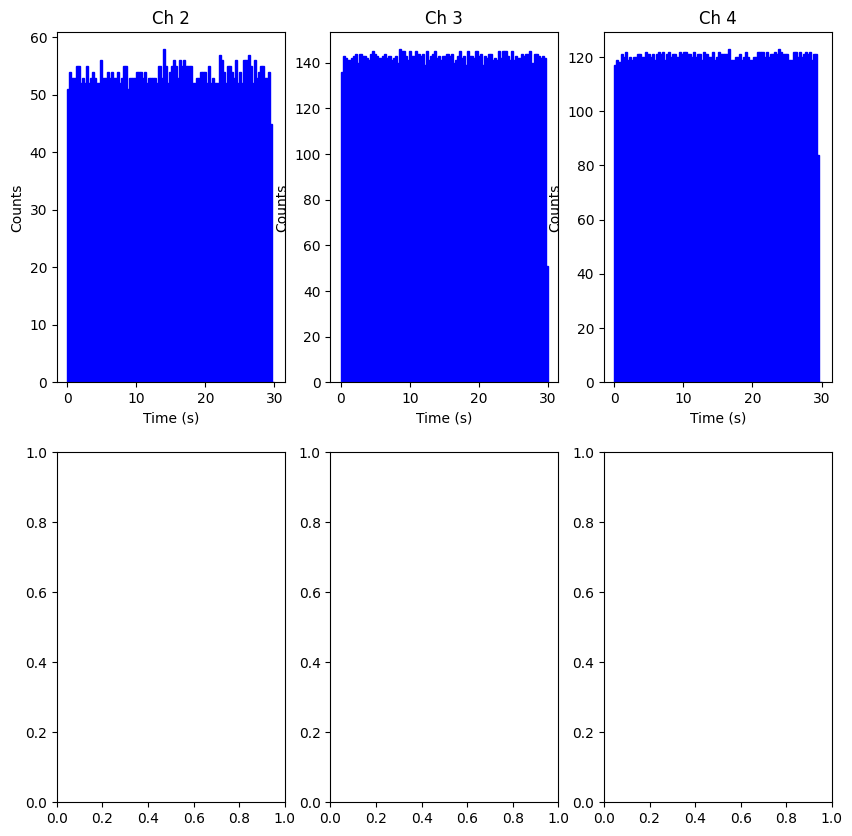

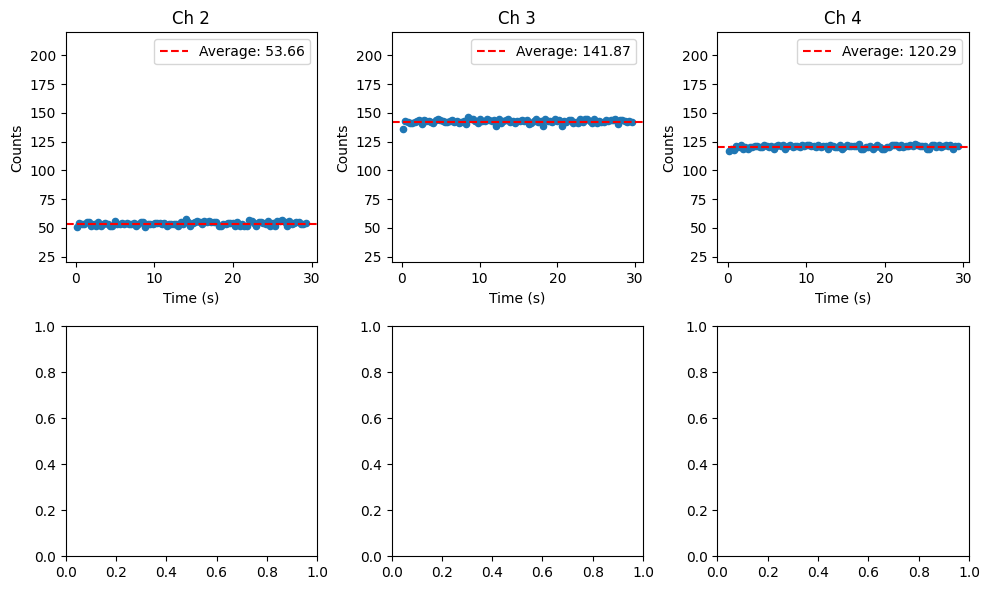

In [18]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

# Create lists to store bin content from each histogram
bin_contents = []
bin_center=[]

# Create lists to store averages for each channel
averages = []

# Define the desired range for each histogram

# Loop through your data and create histograms
for i in range(3):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(timestamps_list[i], range=(0, 30), bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')
    ax.set_title(f'Ch {i + 2}')

  # Store the bin content in the bin_contents list
    bin_contents.append(hist)
    bin_center.append(bins)

# Create a new 3x5 subplot grid to display the scatter plots of bin content
fig2, axes2 = plt.subplots(2, 3, figsize=(10, 6))

for i, content in enumerate(bin_contents):
    # Calculate the center of each bin
    bin_centers = (bin_center[i][:-1] + bin_center[i][1:]) / 2

    # Filter out bins with zero bin content
    non_zero_bins = content != 0
    avg = np.mean(content[non_zero_bins])
    averages.append(avg)

    # Scatter plot of non-zero bin content in the new subplot grid with specified range
    row = i // 3
    col = i % 3
    ax2 = axes2[row, col]
    ax2.scatter(bin_centers[non_zero_bins][:-1], content[non_zero_bins][:-1], marker='o', s=20)

    # Draw the average line on the scatter plot
    ax2.axhline(y=averages[i], color='red', linestyle='--', label=f'Average: {averages[i]:.2f}')

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Counts')
    ax2.set_title(f'Ch {i + 2}')
    ax2.set_ylim(20, 220)
    ax2.legend()

plt.tight_layout()
plt.show()

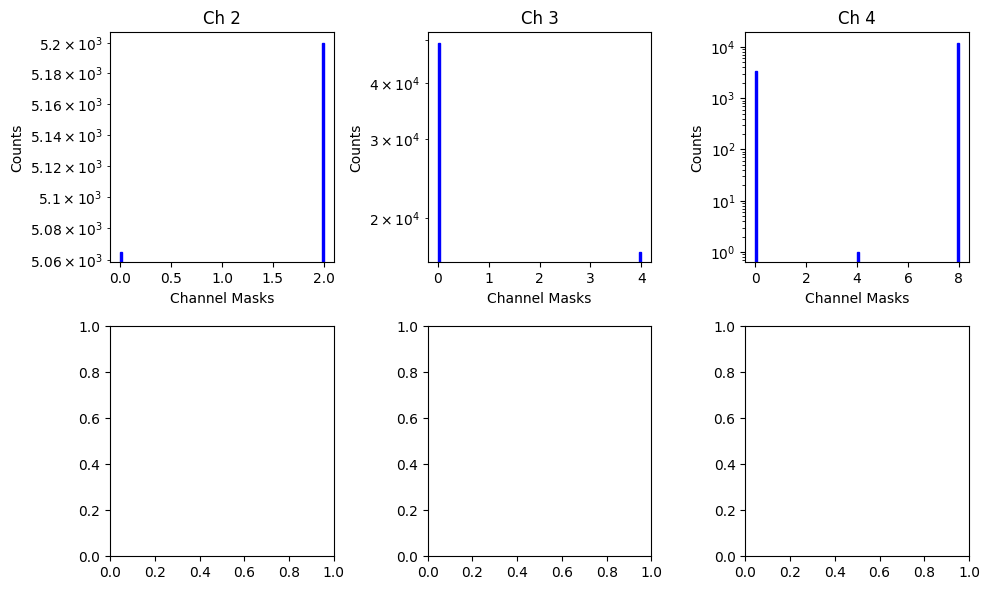

In [5]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Loop through your data and create histograms
for i in range(3):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(masks_list[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Channel Masks')
    ax.set_ylabel('Counts')
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

[0.00549152 0.00537634 0.00645459 0.00538637 0.00552211 0.00637089
 0.00533102 0.00567284 0.00625333 0.00526393 0.00583003 0.00614155
 0.00522406 0.00596465 0.00606947 0.00516208 0.00607719 0.00598073
 0.00514386 0.00623455 0.00584828 0.00517132 0.00636535 0.00570508
 0.00522109 0.00645677 0.00554686 0.00532719 0.00647119 0.0054129
 0.00545835 0.00640168 0.00534145 0.00558125 0.00629314 0.00529611
 0.00571997 0.0061905  0.00527931 0.00589102 0.00610667 0.00521535
 0.00601568 0.00603234 0.00516597 0.00615033 0.00590759 0.00515238
 0.00627208 0.00576056 0.00518436 0.00637584 0.00564561 0.0052266
 0.006457   0.00550611 0.00535195 0.00646597 0.00540389 0.00548366
 0.00637036 0.00533881 0.00562607 0.00627884 0.00527792 0.00578894
 0.00617997 0.00525254 0.00595439 0.00609518 0.00519211 0.0060766
 0.00598007 0.00514967 0.00620528 0.00585145 0.0051401  0.00631069
 0.00573607 0.00521277 0.00641337 0.00560647 0.00529554 0.00648366
 0.0054533  0.00541149 0.00641485 0.00536726 0.00553495 0.0063128

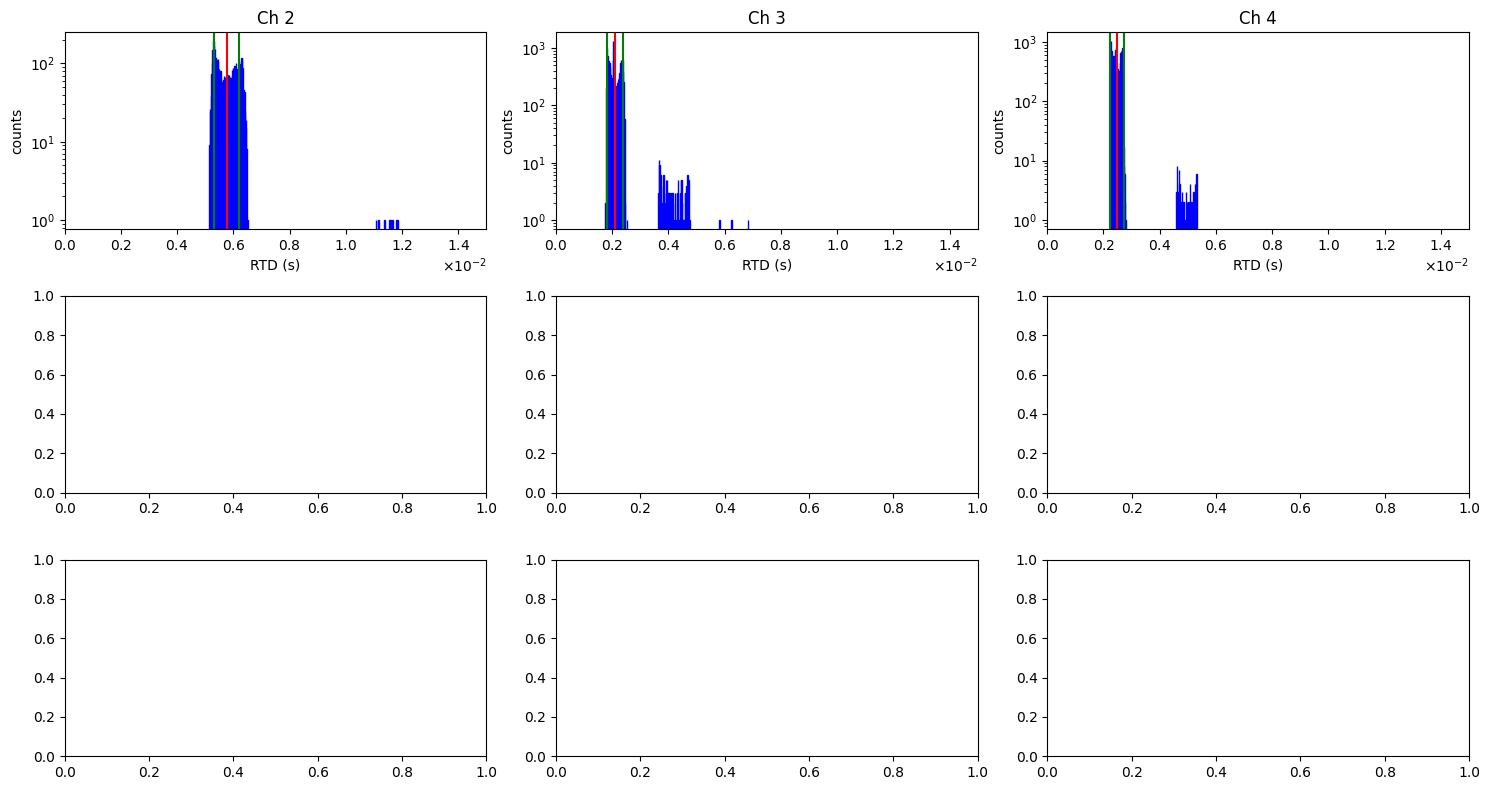

In [21]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

j=2

mean_charge = [] # To store the mean charge per reset for each channel
std_charge = [] # To store the standard deviation for the mean charge per reset for each channel

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff_1 = 5e-2  # Example upper cutoff
    upper_cutoff_2 = 3.5e-3

# Apply conditional filtering to keep only the data within the desired range
    #if (i==0):
       # filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff_1)]
    #if (i!=0):
        #filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff_2)]
    
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff_1)]
    print(filtered_rtd[:200])

    mean_rtd = np.mean(filtered_rtd)
    std_rtd = np.std(filtered_rtd)

#Calcuate the mean charge per reset for each channel
    mean_Q = mean_rtd * 5000 # The charge is in pC since rtd is in s and current is in pA
    std_Q = std_rtd * 5000

    mean_charge.append(mean_Q)
    std_charge.append(std_Q)

    #print("ch", j, " ,mean rtd: ",  mean_rtd, " ,std rtd: ", std_rtd)
    #print("ch", j, " ,mean charge: ",  mean_Q, " ,std charge: ", std_Q)
    j = j+1
    
    print("ch", col +2, " ,mean rtd: ",  mean_rtd, " ,std rtd: ", std_rtd)
    print("ch", col +2, " ,mean charge: ",  mean_Q, " ,std charge: ", std_Q)


# Create a histogram of the filtered differences

    # Create a histogram of time differences
    ax.hist(filtered_rtd, bins=1000,range=(0, 0.02), color='blue', alpha=1, edgecolor='blue')
    ax.axvline(mean_rtd, color = 'red')
    ax.axvline(mean_rtd-std_rtd , color = 'green')
    ax.axvline(mean_rtd+std_rtd, color = 'green')
    
    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))  # Apply scientific notation

     # Add titles (labels) to x and y axes
    ax.set_xlabel('RTD (s)')  # Replace with your desired x-axis label
    ax.set_ylabel('counts')  # Replace with your desired y-axis label

    # Define your desired x-axis range
    x_min = 0 # Replace with your desired minimum x-axis value
    x_max = 15e-3  # Replace with your desired maximum x-axis value

     # Set the x-axis range
    ax.set_xlim(x_min, x_max)
    ax.set_yscale('log')
    ax.set_title(f'Ch {col + 2}')

plt.tight_layout()
plt.show()

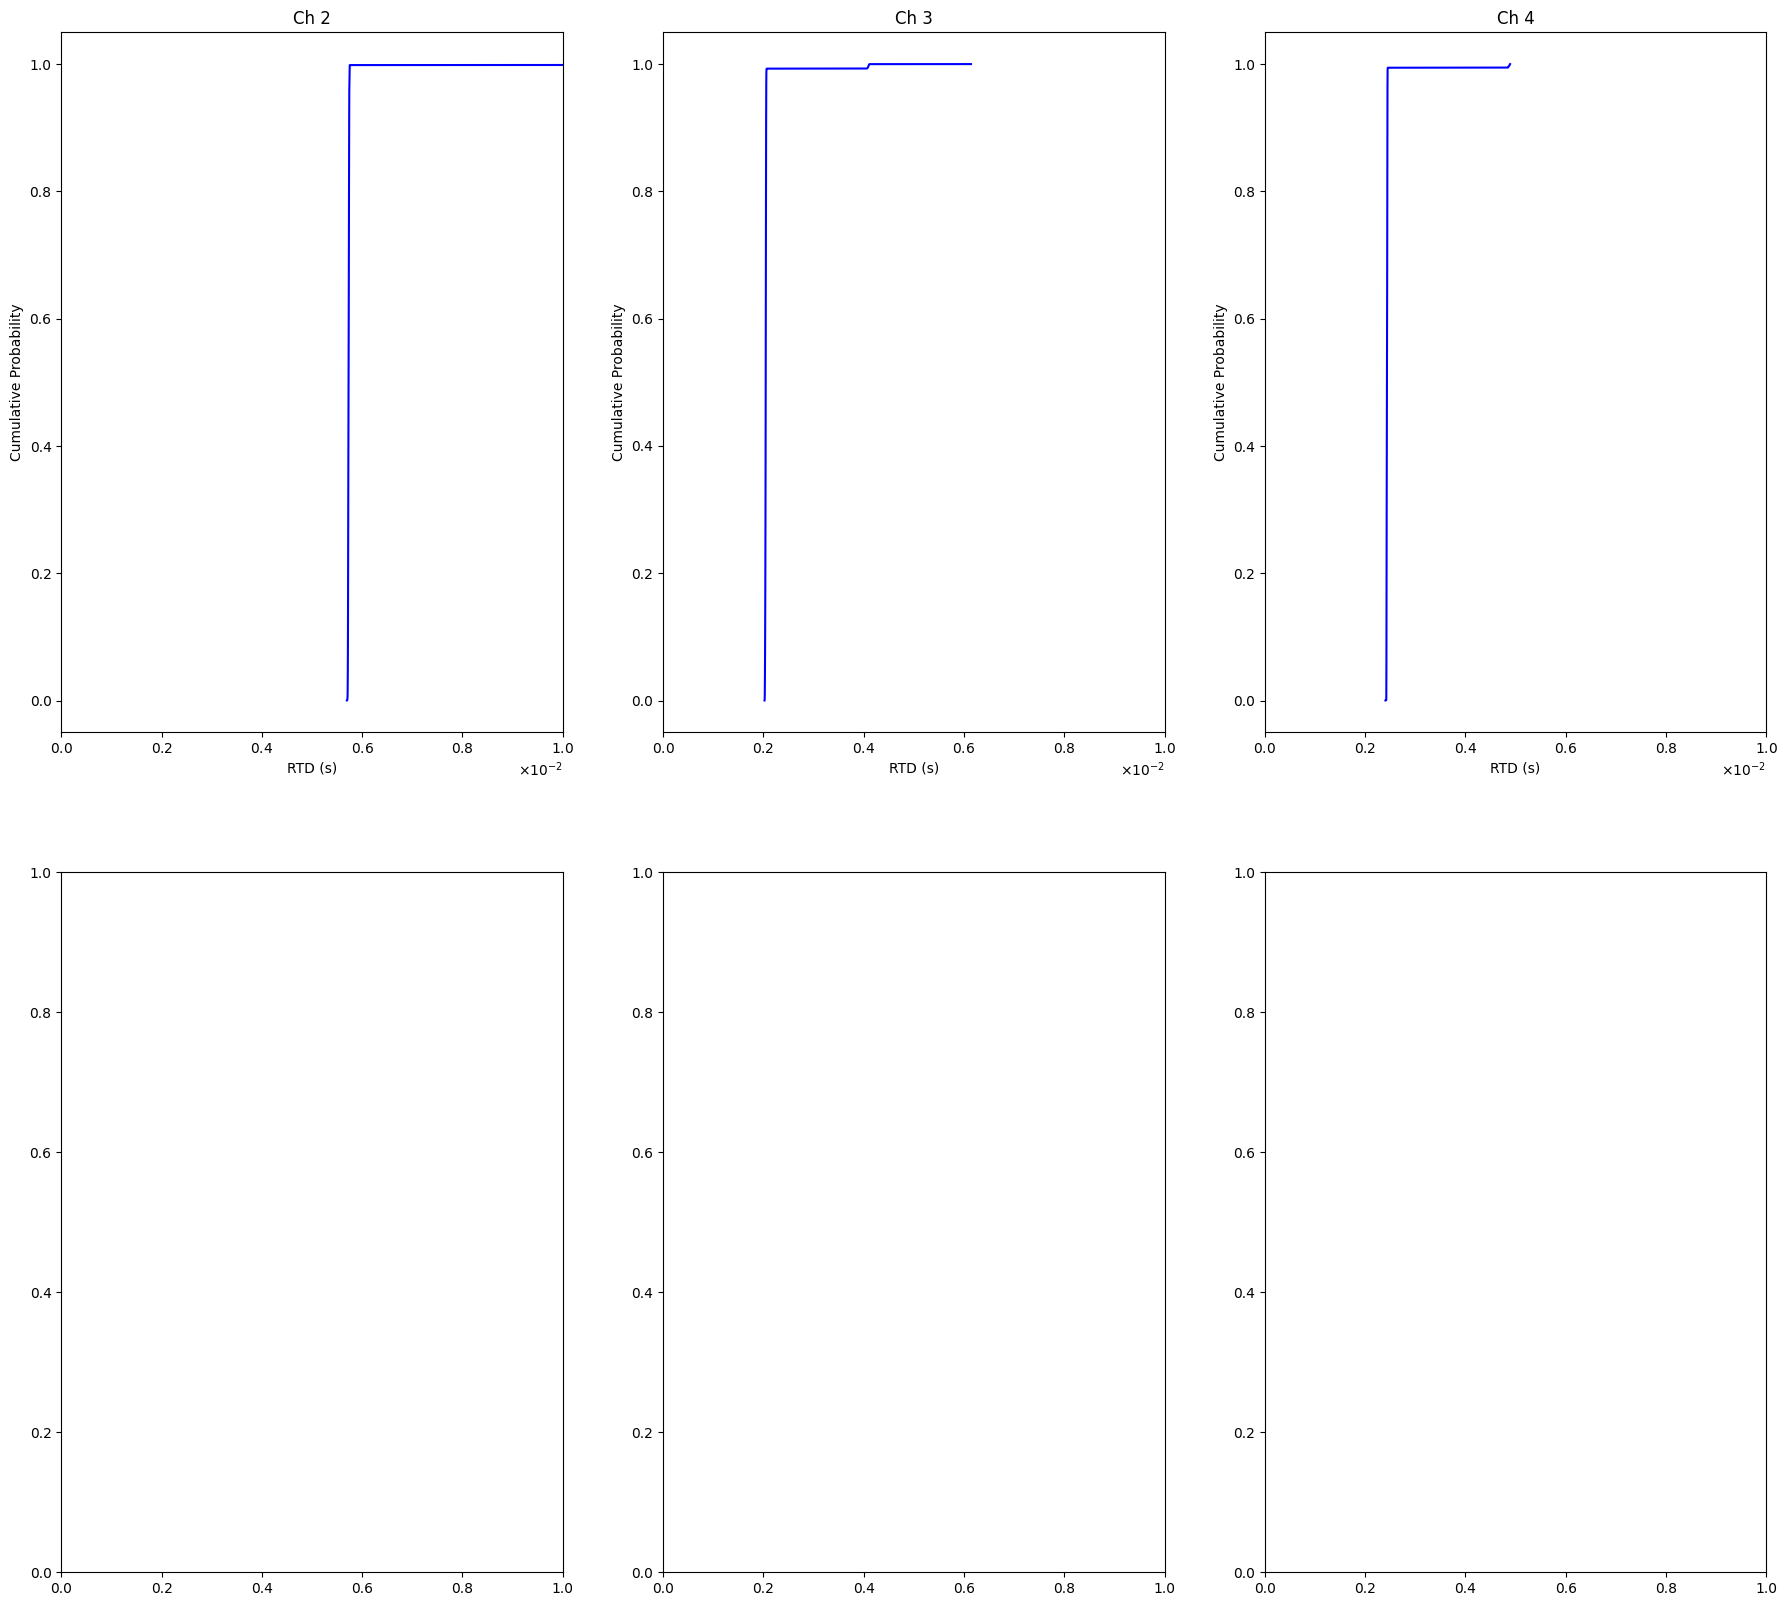

In [77]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 20))

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 5e-2  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

 # Calculate the cumulative distribution
    sorted_rtd = np.sort(filtered_rtd)
    cumulative_prob = np.arange(1, len(sorted_rtd) + 1) / len(sorted_rtd)

    ax.plot(sorted_rtd, cumulative_prob, color='blue')

    
    # Add labels and a title
    ax.set_xlabel('RTD (s)')
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'Ch {i+2}')

    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 0.01  # Replace with your desired maximum x-axis value

    # Set the x-axis range
    ax.set_xlim(x_min, x_max)